In [103]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


In [2]:
# Loading Dataset

df1 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-1990-1999.csv")
df2 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2000-2012.csv")
df3 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2012-2014.csv")
df4 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2015-2016.csv")
df5 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2017-2024.csv")

df = pd.concat([df1,df2,df3,df4,df5])

In [98]:
# print dataset of first five rows

df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New Generation,1976.0,47200.0,68.0,1990,1,4,6


In [4]:
# print shape of the dataset

df.shape

(930539, 11)

In [5]:
# print information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930539 entries, 0 to 184335
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930539 non-null  object 
 1   town                 930539 non-null  object 
 2   flat_type            930539 non-null  object 
 3   block                930539 non-null  object 
 4   street_name          930539 non-null  object 
 5   storey_range         930539 non-null  object 
 6   floor_area_sqm       930539 non-null  float64
 7   flat_model           930539 non-null  object 
 8   lease_commence_date  930539 non-null  int64  
 9   resale_price         930539 non-null  float64
 10  remaining_lease      221489 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.2+ MB


In [6]:
# print all columns from the dataset

df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [7]:
# Describe the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,930539.0,95.688992,25.818864,28.0,73.0,93.0,113.0,307.0
lease_commence_date,930539.0,1988.312737,10.700772,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,930539.0,321832.952703,171456.045639,5000.0,194000.0,298000.0,419000.0,1588000.0


# Preprocessing

### Data Cleaning

In [8]:
# print all unique values from dataset

df.nunique()

month                   415
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9571
remaining_lease         727
dtype: int64

In [9]:
# print the sum of missing values from dataset
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [10]:
# convert year and month to float value
def convert_to_years(yrs):
    if pd.notna(yrs) and isinstance(yrs, str):
        if 'years' in yrs:
            parts = yrs.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return yrs

In [11]:

df["remaining_lease"] = df["remaining_lease"].apply(convert_to_years)

In [12]:
df.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
184331,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62.250000
184332,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.083333
184333,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.250000
184334,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.166667
184335,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,775000.0,60.166667


In [13]:
# fill null values in remaining_lease with mode beacause null value more than 25%, it will affected in accuracy
df["remaining_lease"]=df["remaining_lease"].fillna(df["remaining_lease"].mode()[0])
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0


In [14]:
df["remaining_lease"].value_counts()

remaining_lease
68.000000    711653
95.000000      2420
67.000000      2212
69.000000      1914
71.000000      1767
              ...  
97.750000         1
97.583333         1
97.250000         1
41.500000         1
97.416667         1
Name: count, Length: 674, dtype: int64

In [15]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [16]:
# splitting the year and month from month column

df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

In [17]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0,1990,01
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0,1990,01
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0,1990,01


In [18]:
# drop month column from the dataframe

df.drop("month", axis=1, inplace=True)

In [19]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0,1990,01
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0,1990,01
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0,1990,01


In [20]:
# splitting the storey range to lower and upper bounds

df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)


In [21]:
# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01,10,12
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01,4,6


In [22]:
# drop store_range column from the dataframe

df.drop("storey_range", axis=1,inplace=True)

In [23]:
df.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,01,10,12
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,01,4,6


In [24]:
df.dtypes

town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year             object
resale_month            object
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [25]:
#converting columns to numerical value
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [26]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## Removing Text Errors from columns

In [27]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [28]:
df["town"].value_counts()

town
TAMPINES           80216
YISHUN             70302
JURONG WEST        66911
BEDOK              66827
WOODLANDS          65771
ANG MO KIO         52218
HOUGANG            50932
BUKIT BATOK        44640
CHOA CHU KANG      38486
BUKIT MERAH        34486
PASIR RIS          33303
SENGKANG           32728
TOA PAYOH          31649
QUEENSTOWN         28858
GEYLANG            28273
CLEMENTI           28106
BUKIT PANJANG      27795
KALLANG/WHAMPOA    27313
JURONG EAST        24851
SERANGOON          22884
BISHAN             21316
PUNGGOL            20895
SEMBAWANG          13960
MARINE PARADE       8055
CENTRAL AREA        7174
BUKIT TIMAH         2526
LIM CHU KANG          64
Name: count, dtype: int64

In [29]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353834
3 ROOM              296790
5 ROOM              196237
EXECUTIVE            69888
2 ROOM               11941
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [30]:
# replacing duplicates from flat_type
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [31]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353834
3 ROOM              296790
5 ROOM              196237
EXECUTIVE            69888
2 ROOM               11941
1 ROOM                1305
MULTI GENERATION       544
Name: count, dtype: int64

In [32]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17640
BEDOK RESERVOIR RD    14753
ANG MO KIO AVE 10     13841
ANG MO KIO AVE 3      12181
HOUGANG AVE 8          9381
                      ...  
SEMBAWANG WAY            15
GEYLANG EAST AVE 2       15
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [33]:
df['flat_model'].value_counts()

flat_model
Model A                   196109
Improved                  169039
New Generation            110478
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47134
Simplified                 34416
Apartment                  25694
Standard                   25251
SIMPLIFIED                 23258
Maisonette                 17539
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10179
APARTMENT                   9901
DBSS                        3343
Adjoined flat               1255
Model A-Maisonette          1097
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      440
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       126
Premium Apartment Loft       111
Premium Maisonette            86
Improved-Maisonette           83

In [34]:
# replace duplicates from flat_model column
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [35]:
df['flat_model'].value_counts()

flat_model
Model A                   266490
Improved                  242628
New Generation            189376
Simplified                 57674
Premium Apartment          47140
Standard                   42626
Apartment                  35595
Maisonette                 29754
Model A2                   10179
DBSS                        3343
Model A-Maisonette          2079
Adjoined flat               1255
Terrace                      694
Multi Generation             544
Type S1                      440
Type S2                      217
2-room                       147
Improved-Maisonette          127
Premium Apartment Loft       111
Premium Maisonette            86
3Gen                          34
Name: count, dtype: int64

### Removing Duplicates

In [36]:
df.duplicated().sum()

2349

In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Detecting and Removing Outliers

In [38]:
float_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [39]:
int_cols = [var for var in df.columns if df[var].dtype == 'int64']
int_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

#### BOX PLOTS

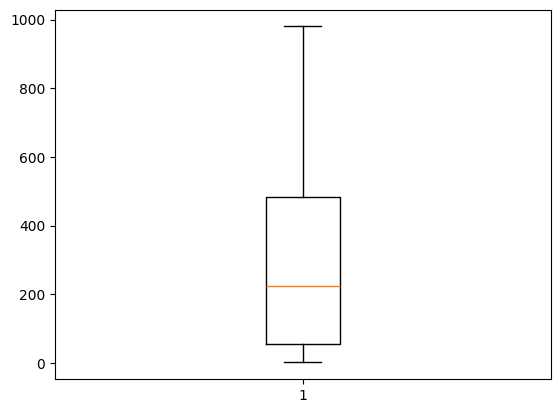

In [40]:
# Creating plot
plt.boxplot(df['block'] )

plt.show()

In [41]:
#Interquantile Range
Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-586.0, 1126.0)

In [42]:
df.block = df.block.clip(lower_bound , upper_bound)

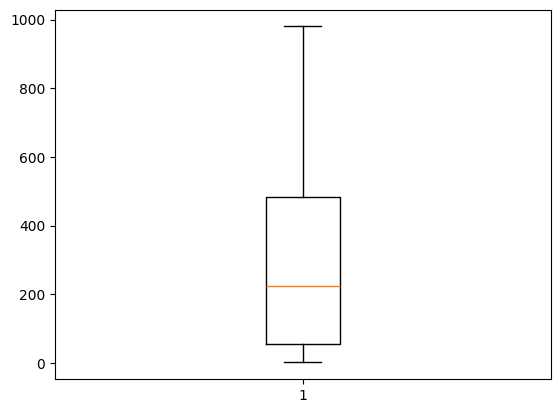

In [43]:
# Creating plot
plt.boxplot(df['block'] )

plt.show()

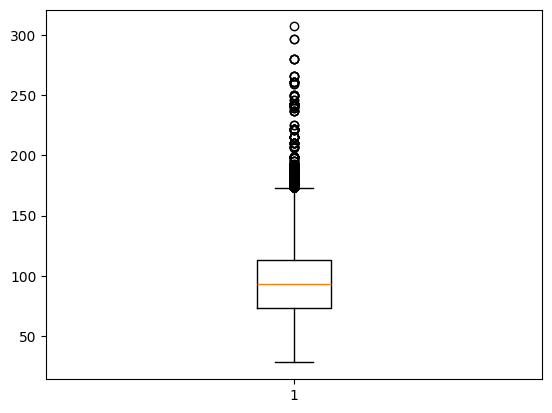

In [44]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

plt.show()

In [45]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [46]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

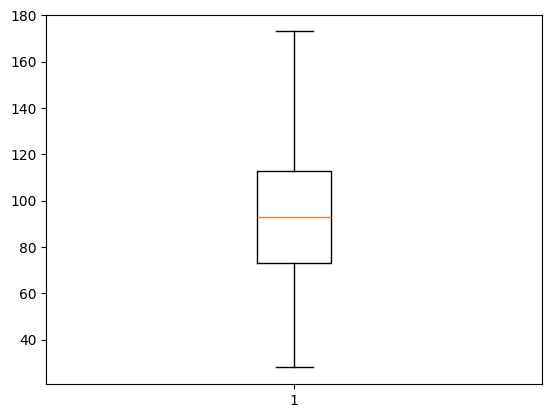

In [47]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

plt.show()

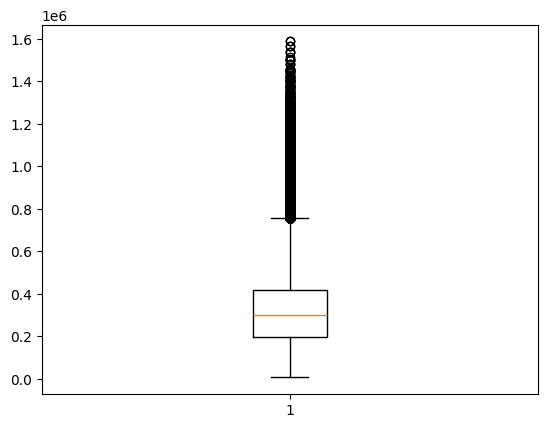

In [48]:
# Creating plot
plt.boxplot(df['resale_price'] )

plt.show()

In [49]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-143500.0, 756500.0)

In [50]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

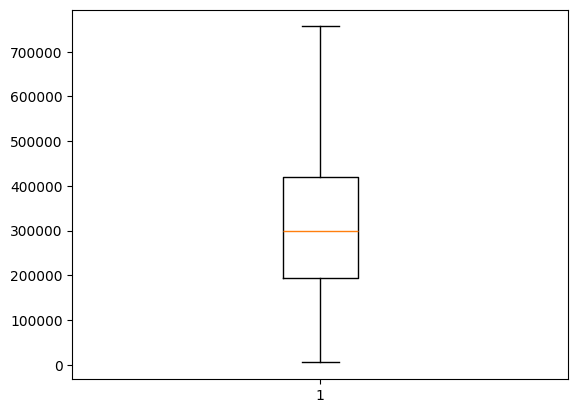

In [51]:
# Creating plot
plt.boxplot(df['resale_price'] )

plt.show()

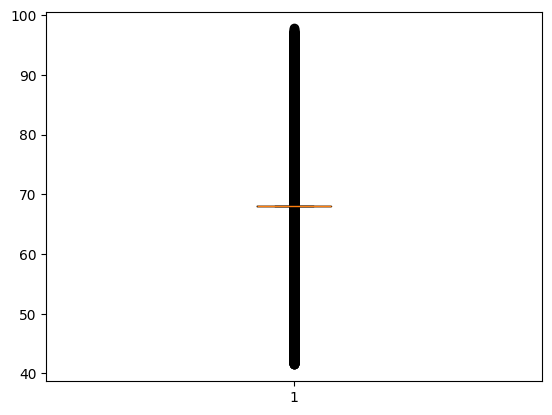

In [52]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

plt.show()

In [53]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [54]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

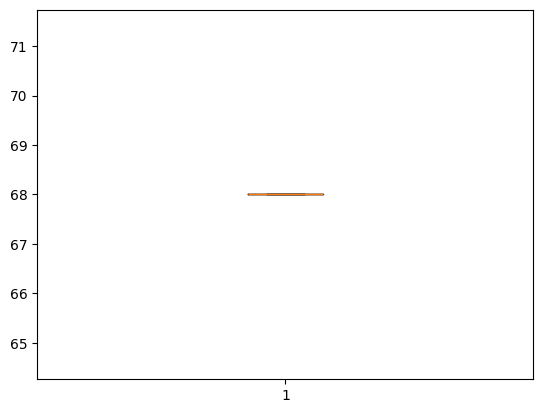

In [55]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

plt.show()

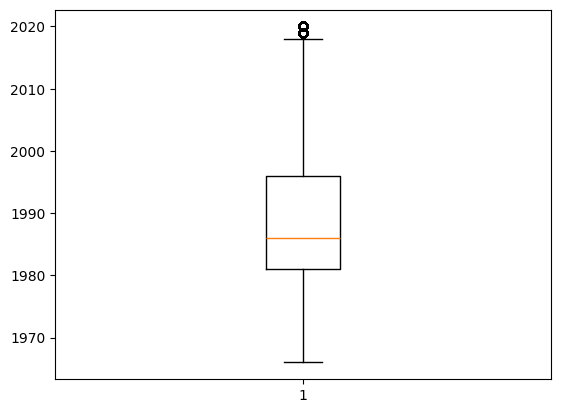

In [56]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

plt.show()

In [57]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [58]:

df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

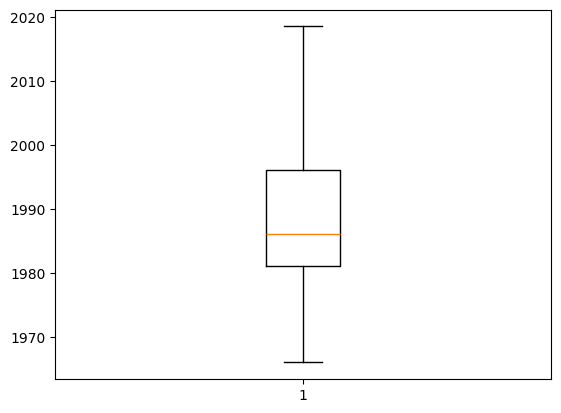

In [59]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

plt.show()

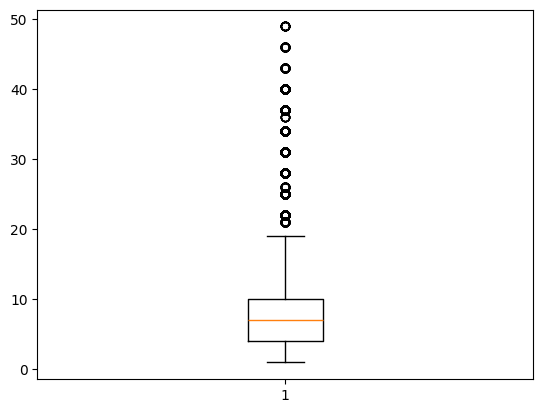

In [60]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

plt.show()

In [61]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [62]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

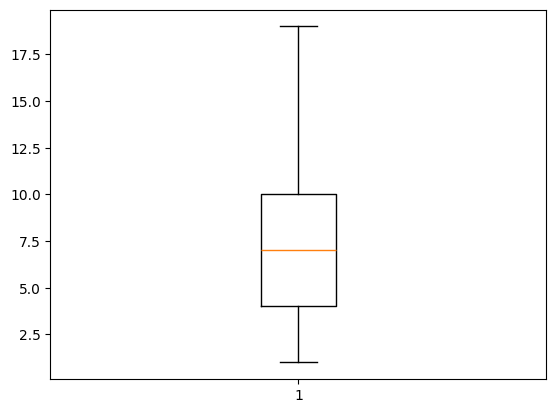

In [63]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )
plt.show()

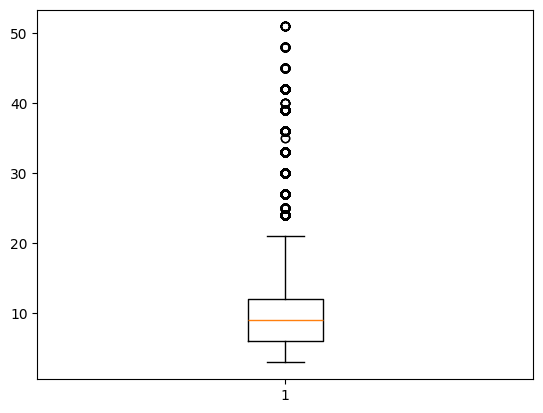

In [64]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

plt.show()

In [65]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [66]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

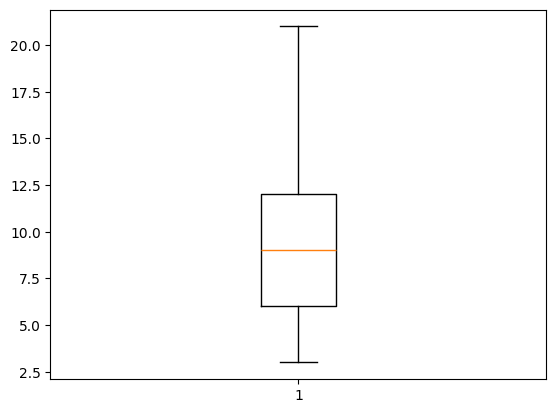

In [67]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

plt.show()

#### Categorical data Vs Frequency using BarPlot

In [68]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

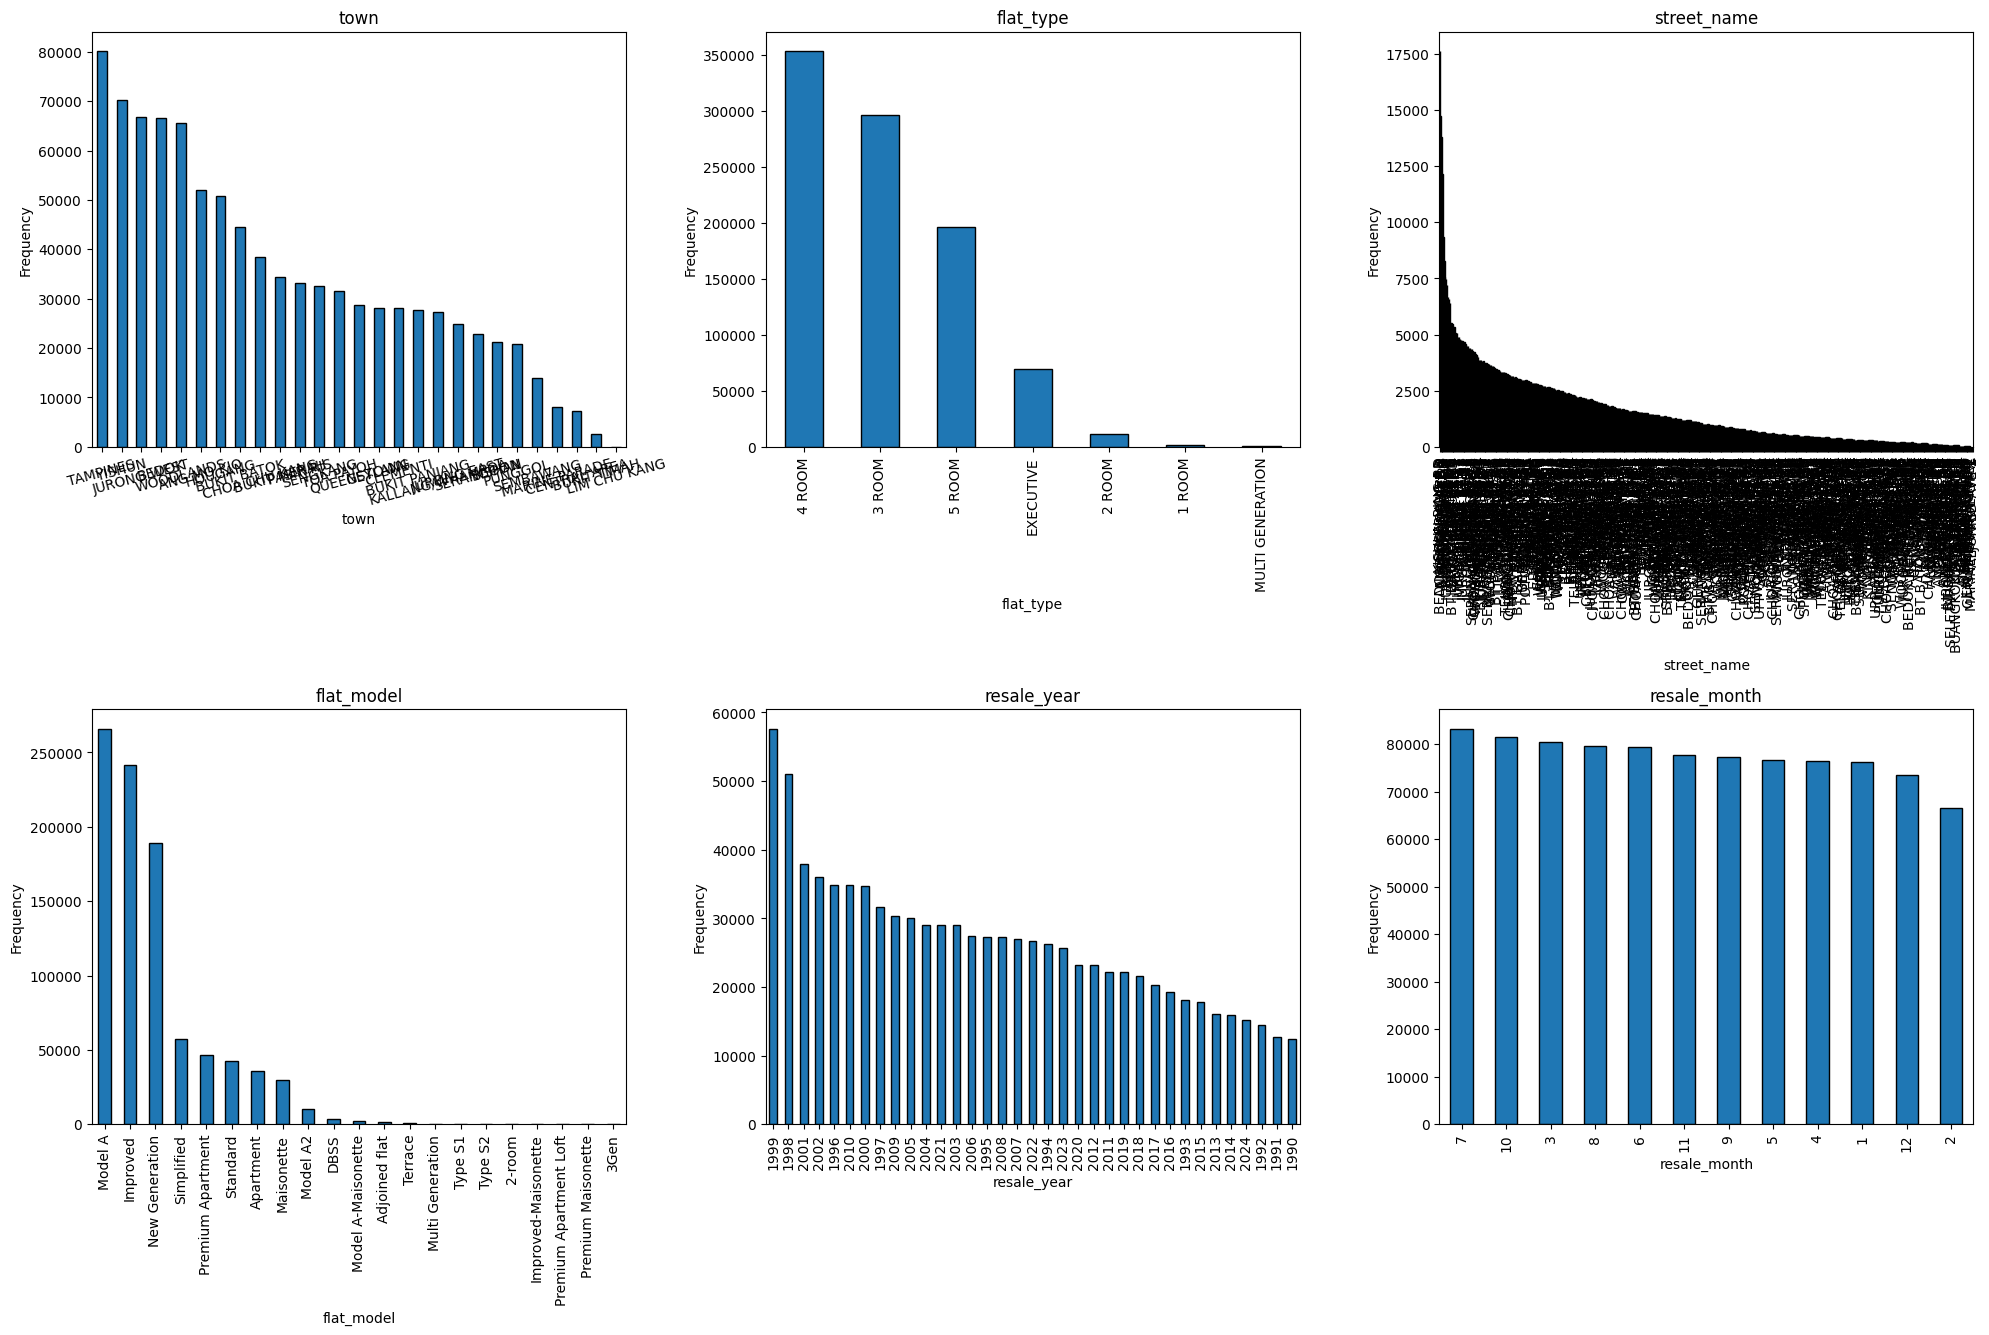

In [69]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Feature Vs Target (Categorical Data )

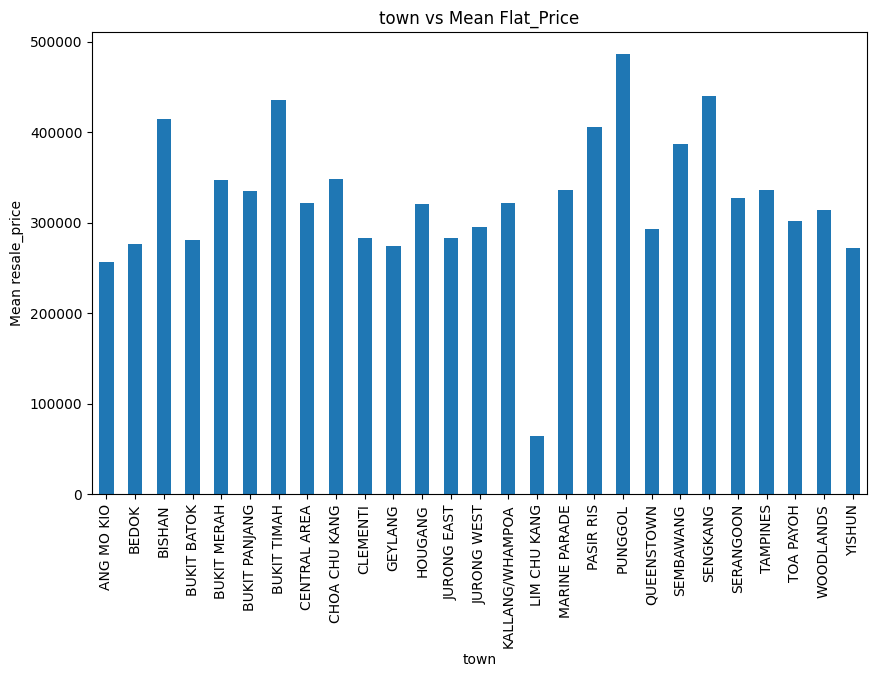

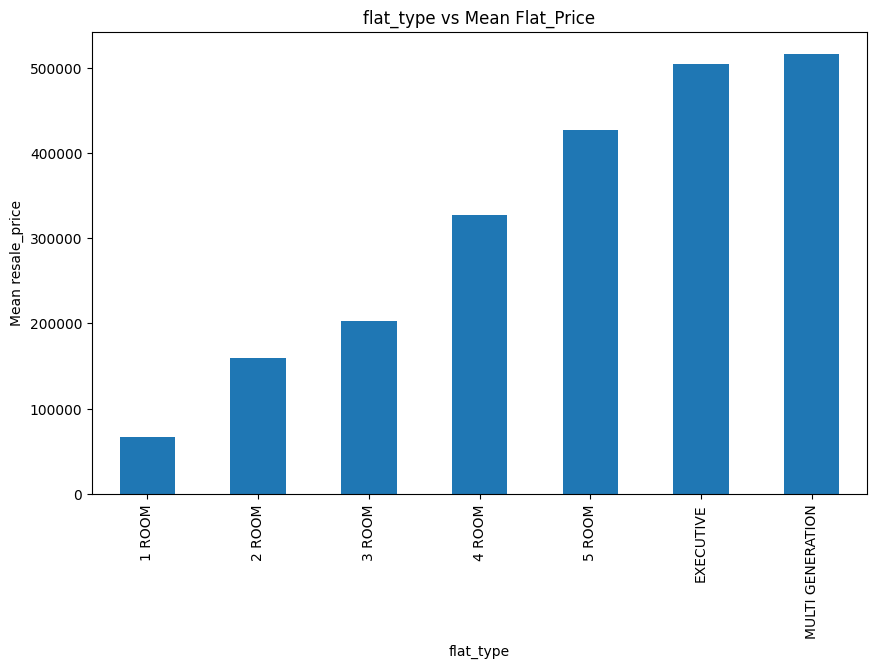

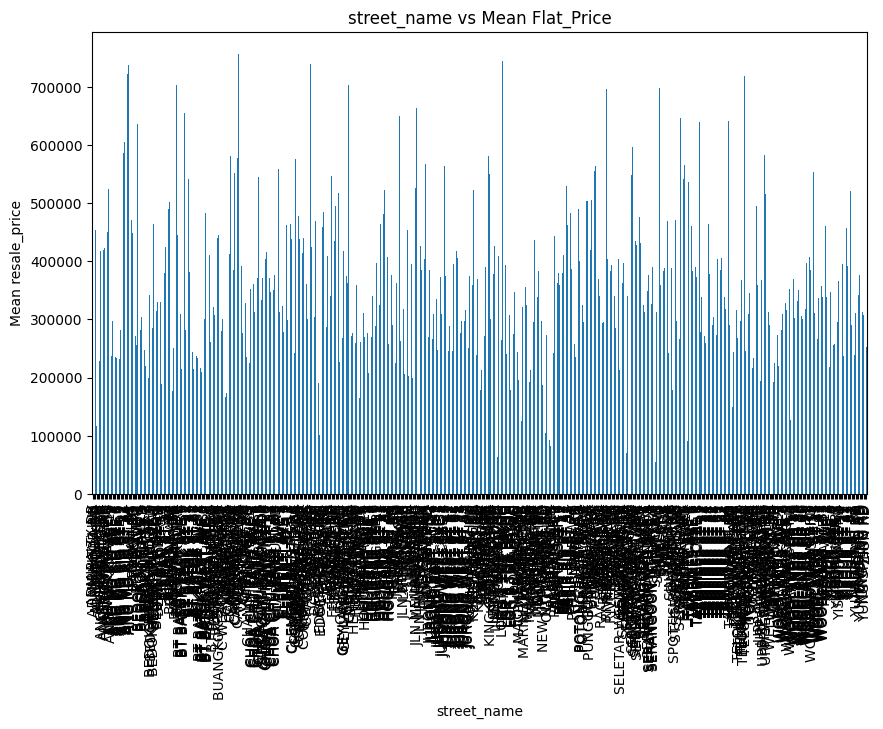

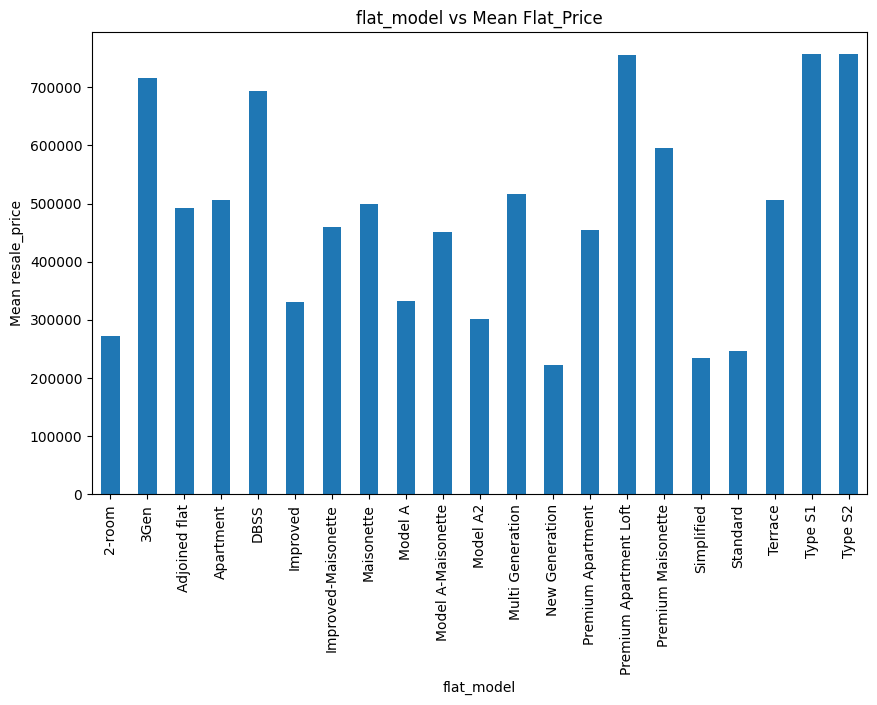

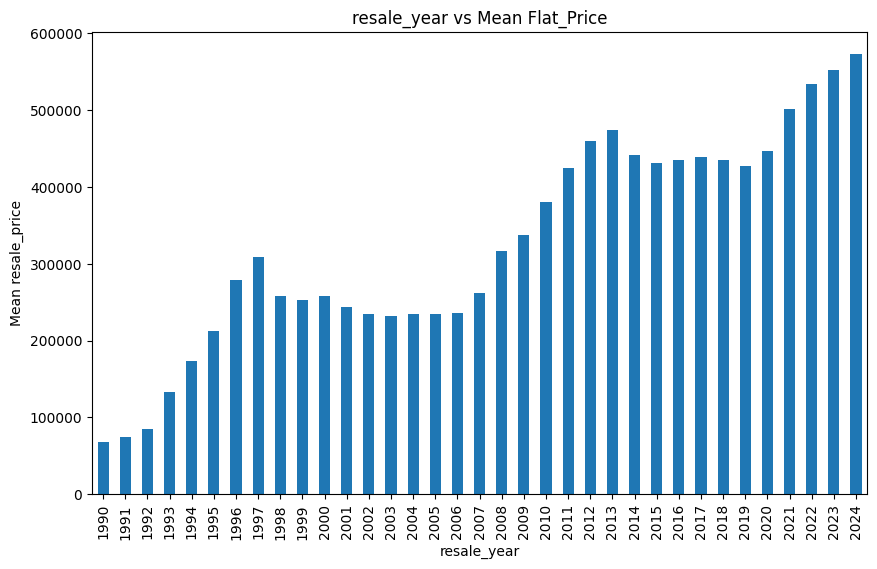

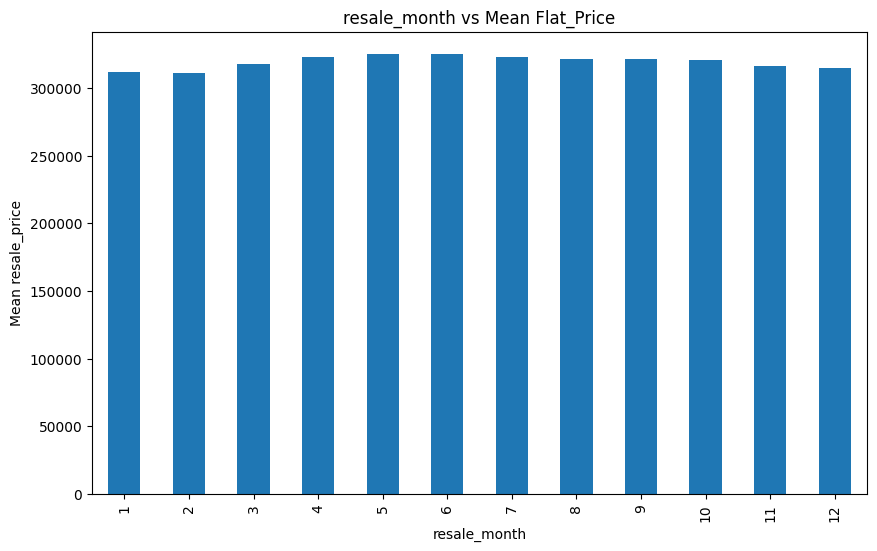

In [70]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flat_Price')
    plt.show()

### Feature Vs Target (Continuous Data )

In [71]:
float_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [72]:
int_cols = [var for var in df.columns if df[var].dtype == 'int64']
int_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

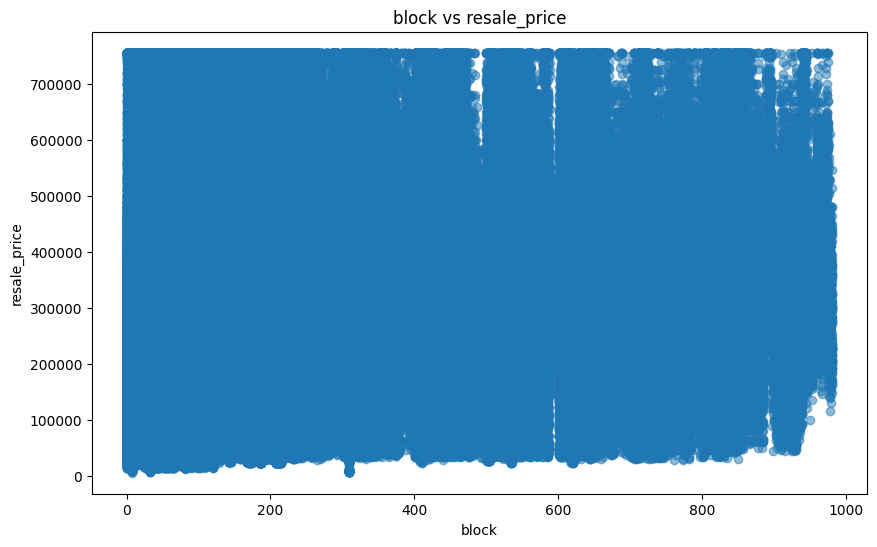

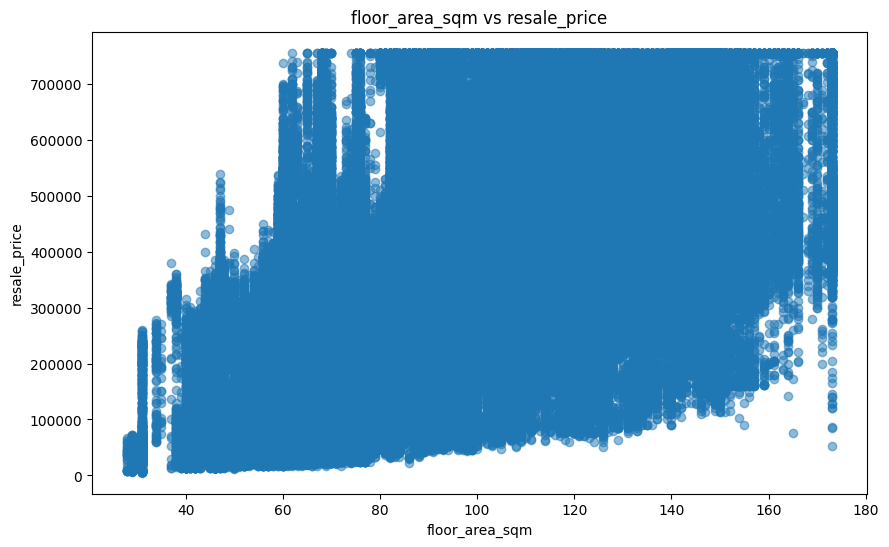

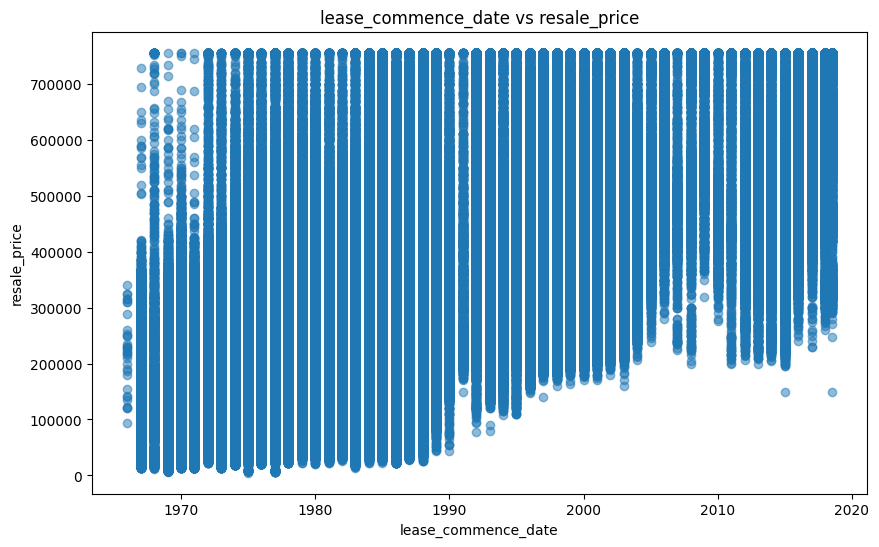

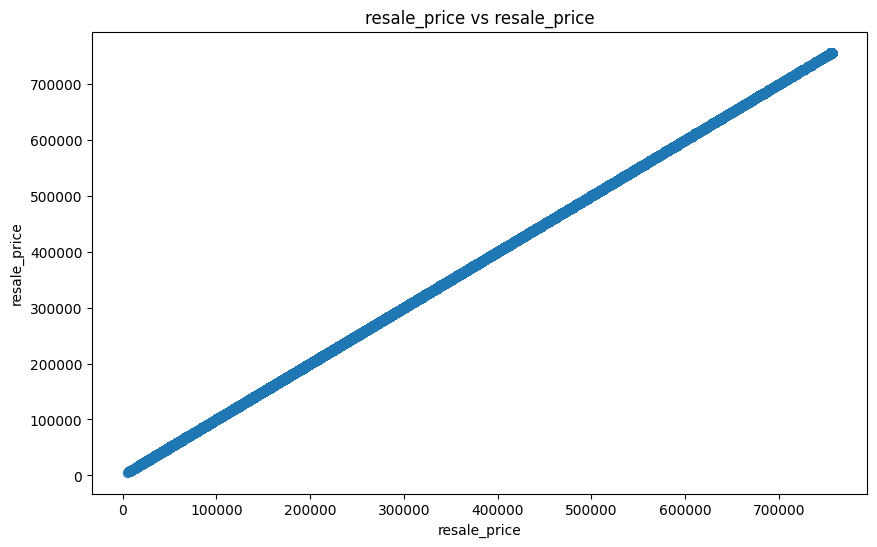

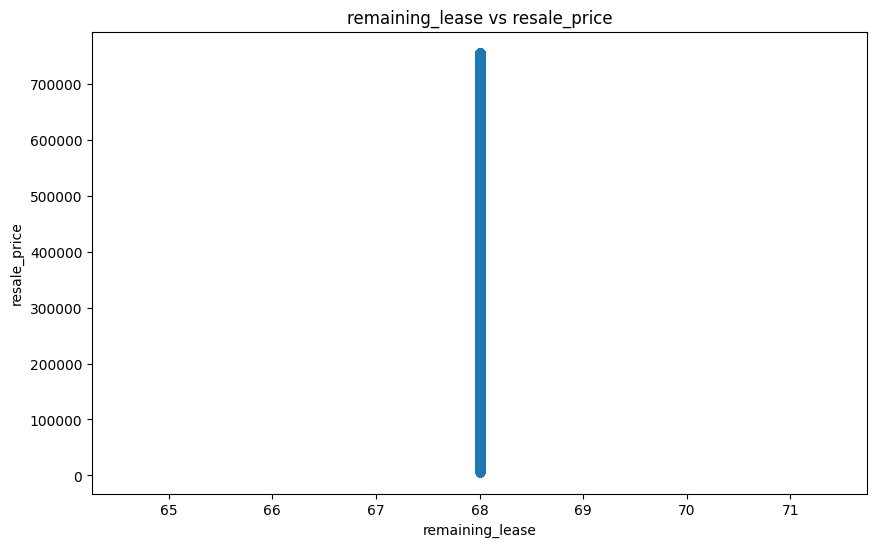

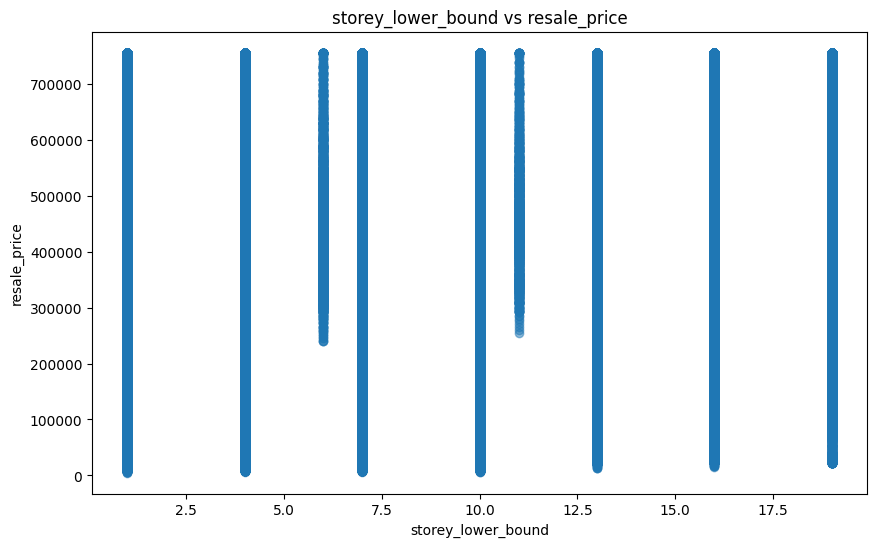

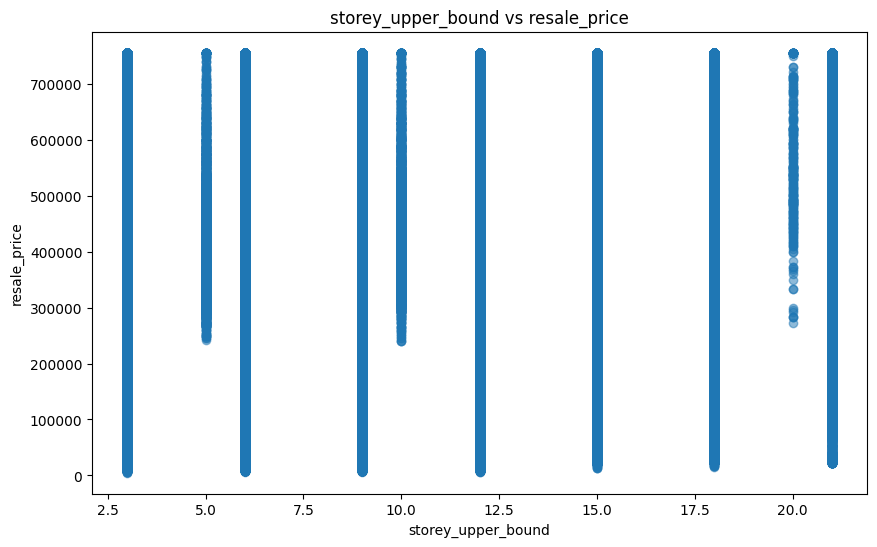

In [73]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

### Encoding Categorical Variables

In [74]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [75]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder

le= LabelEncoder()

In [76]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [77]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [78]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [79]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [80]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [81]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [82]:
# save the processed data for the deployment
df1.to_csv('final.csv')

### Correlation

In [83]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208283,0.050070,0.586957,0.201041,0.163851,0.332837,0.123394,NaN,0.123987,0.003906,-0.018986,-0.018725
flat_type,0.208283,1.000000,0.127799,0.386294,0.954858,0.242157,0.406847,0.598215,NaN,0.100537,0.003378,0.077313,0.077643
block,0.050070,0.127799,1.000000,0.045603,0.187845,-0.003428,0.001476,-0.084211,NaN,-0.117460,0.002279,-0.125077,-0.125111
street_name,0.586957,0.386294,0.045603,1.000000,0.355120,0.354235,0.737092,0.379166,NaN,0.317497,0.006106,0.082103,0.082735
floor_area_sqm,0.201041,0.954858,0.187845,0.355120,1.000000,0.200094,0.384707,0.572537,NaN,0.062182,0.002834,0.043540,0.043728
flat_model,0.163851,0.242157,-0.003428,0.354235,0.200094,1.000000,0.355252,0.245670,NaN,0.162341,0.001519,0.020228,0.020583
lease_commence_date,0.332837,0.406847,0.001476,0.737092,0.384707,0.355252,1.000000,0.544600,NaN,0.432094,0.003304,0.154665,0.155056
resale_price,0.123394,0.598215,-0.084211,0.379166,0.572537,0.245670,0.544600,1.000000,NaN,0.685375,0.004895,0.210383,0.213009
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123987,0.100537,-0.117460,0.317497,0.062182,0.162341,0.432094,0.685375,NaN,1.000000,-0.026023,0.097080,0.099093


### Heatmap

<Axes: >

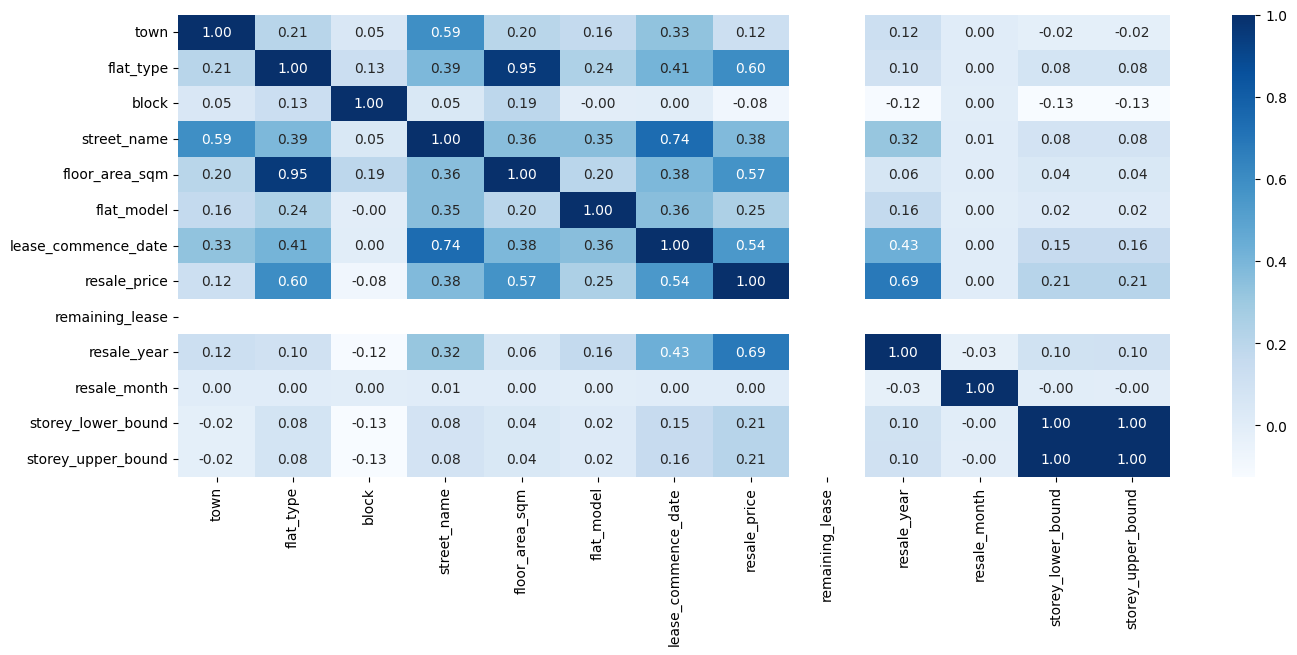

In [84]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

# MACHINE LEARNING MODEL

### Train and Test Split

In [85]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']

#splitting the data into training and testing sets with the ratio of train:80%, test:20% 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(742552, 12) (185638, 12) (742552,) (185638,)


### Standard Scalar

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.68446403,  1.03995343, -0.50475278, ..., -0.16170708,
         -0.58037315, -0.583705  ],
        [-1.49565779, -0.01488893,  1.55459008, ..., -0.7483418 ,
          0.09282013,  0.08961216],
        [-0.21323319,  1.03995343, -0.30681224, ..., -0.7483418 ,
         -0.58037315, -0.583705  ],
        ...,
        [-1.23917287, -0.01488893, -0.47810694, ...,  0.42492765,
         -0.58037315, -0.583705  ],
        [ 0.04325173, -0.01488893, -0.71791951, ...,  1.01156237,
         -1.25356642, -1.25702217],
        [ 0.81270649, -1.06973128, -1.01863685, ..., -0.7483418 ,
          0.7660134 ,  0.76292933]]),
 array([[ 0.04325173, -1.06973128, -0.873988  , ..., -1.62829389,
         -0.58037315, -0.583705  ],
        [ 0.04325173, -1.06973128, -1.0224434 , ...,  0.71824501,
         -1.25356642, -1.25702217],
        [ 0.81270649, -1.06973128, -0.7331457 , ..., -0.7483418 ,
          0.09282013,  0.08961216],
        ...,
        [-0.72620303, -0.01488893, -0.23829437, ..., -

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

## Linear Regression

In [89]:
linear_reg = LinearRegression(fit_intercept=True) #initialise
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test) # Make predictions on test set using linear model

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)

# Calculate R-squared (R2) Score
r2_linear = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae_linear)
print("Mean Squared Error (MSE)     :", mse_linear)
print("Root Mean Square Error (RMSE):", rmse_linear)
print("R-squared (R2) Score         :", r2_linear)


Mean Absolute Error (MAE)    : 57315.68076951644
Mean Squared Error (MSE)     : 5546070048.831312
Root Mean Square Error (RMSE): 74471.94135264175
R-squared (R2) Score         : 0.7934320547609502


## K Nearest Neighbor Regression

In [90]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 29019.067454368178
Mean Squared Error (MSE)     : 1795872685.736946
Root Mean Square Error (RMSE): 42377.738091325096
R-squared (R2) Score         : 0.9331112432159441


## Decision Tree Regression

In [91]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17495.546062452428
Mean Squared Error (MSE)     : 681723755.7854518
Root Mean Square Error (RMSE): 26109.84020987972
R-squared (R2) Score         : 0.9746086374291426


## Random Forest Regression

In [92]:
# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13893.510767705231
Mean Squared Error (MSE)     : 403297416.0263441
Root Mean Square Error (RMSE): 20082.266207436453
R-squared (R2) Score         : 0.9849788556914576


## Finalizing Models

In [93]:
models = [ 'LinearRegression :','KNeighborsRegressor :','DecisionTreeRegressor :', 'RandomForestRegressor :']
score = [r2_linear,r2_knn,r2_dt, rf_r2]

# fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
# fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

LinearRegression : 0.7934320547609502
KNeighborsRegressor : 0.9331112432159441
DecisionTreeRegressor : 0.9746086374291426
RandomForestRegressor : 0.9849788556914576

Model: RandomForestRegressor : contain Maximum R2_Score: 0.9849788556914576 


## Save the model

In [94]:
model=rf_regressor.fit(X_train, y_train)

In [95]:
model

RandomForestRegressor(random_state=42)

In [96]:
import pickle

# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


### Predicting

In [99]:
pre_df =df1.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
288684,15,4,74.0,163,82.0,14,1976.0,406000.0,68.0,2009,5,7,9
140340,21,4,513.0,452,107.0,24,1999.0,259888.0,68.0,2004,1,10,12
169509,21,4,601.0,429,91.0,29,1997.0,198888.0,68.0,2005,1,7,9
28897,1,5,222.0,1,127.0,14,1993.0,382000.0,68.0,2000,11,1,3
183344,8,4,11.0,83,99.0,15,1978.0,438000.0,68.0,2024,7,1,3


In [100]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

### Resale Price

In [101]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([401900.  , 261970.  , 209761.32, 379220.  , 441228.88])